The code in the cell immediately below (excluding comments) was given by David Horner in the Slack channel for week 4:

In [43]:
import pandas as pd
import re
with open("resnet_output.txt") as f: #changed training_report to "resnet_output.txt"
    lines = f.readlines()
li = []
for line in lines:
    if(re.match(r'^Finished step ', line)):
        x = re.search(r'^Finished step (?P<step>\d*) of (?P<tot_steps>\d*) in epoch (?P<epoch>\d*),loss=(?P<loss>[\d.]*), acc=(?P<acc>[\d.]*) \((?P<ips>[\d.]*)', line)
        li.append(x.groupdict())
        
df = pd.DataFrame(li) 

In [44]:
df

,step,tot_steps,epoch,loss,acc,ips
0,1,5004,0,83.713,0.004,15.056
1,2,5004,0,46.097,0.008,1124.715
2,3,5004,0,27.158,0.000,1137.371
3,4,5004,0,17.372,0.008,1143.787
4,5,5004,0,13.281,0.000,1130.548
...,...,...,...,...,...,...
8708,3705,5004,1,3.045,0.402,722.036
8709,3706,5004,1,2.824,0.387,738.324
8710,3707,5004,1,3.250,0.301,688.463
8711,3708,5004,1,3.147,0.285,675.981


In [45]:
df['loss']

0       83.713
1       46.097
2       27.158
3       17.372
4       13.281
         ...  
8708     3.045
8709     2.824
8710     3.250
8711     3.147
8712     2.881
Name: loss, Length: 8713, dtype: object

this is the sum of iters 19402705
this is iters [   1    2    3 ... 3707 3708 3709]
this is losses [83.713 46.097 27.158 ...  3.25   3.147  2.881]
this is accs [0.004 0.008 0.    ... 0.301 0.285 0.41 ]


Text(0.5, 1.0, 'Training Losses vs. Iterations')

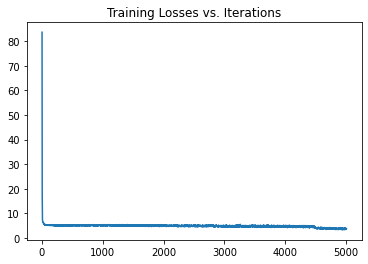

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

iters = df['step'].to_numpy(dtype="int")
losses = df['loss'].to_numpy(dtype="float32")
accs = df['acc'].to_numpy(dtype="float32")

print('this is the sum of iters', np.sum(iters))
print('this is iters', iters)
print('this is losses', losses)
print('this is accs', accs)

plt.plot(iters[0:5004], losses[0:5004])
plt.title('Training Losses vs. Iterations')



Text(0.5, 1.0, 'Training Accuracies vs. Iterations')

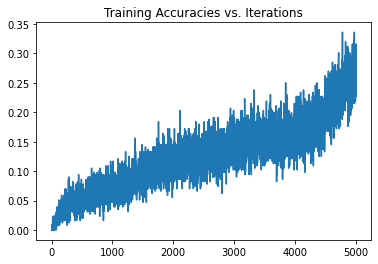

In [55]:
plt.clf()
plt.plot(iters[0:5004], accs[0:5004])
plt.title('Training Accuracies vs. Iterations')